# Loading the Data


In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_meta = pd.read_csv('meta.csv')
df_meta.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [3]:
df_dicom = pd.read_csv('dicom_info.csv')
df_dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [4]:
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [5]:
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path
imdir = 'jpeg'
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)

In [6]:
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[1]
    full_mammo_dict[key] = dicom

for dicom in cropped_images:
    key = dicom.split("/")[1]
    cropped_images_dict[key] = dicom

for dicom in roi_img:
    key = dicom.split("/")[1]
    roi_img_dict[key] = dicom

next(iter(full_mammo_dict.items()))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 'jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

In [7]:
mass_train = pd.read_csv('mass_case_description_train_set.csv')
mass_test = pd.read_csv('mass_case_description_test_set.csv')

In [8]:
def fix_image_path(data):
    for index,image in enumerate(data.values):
        data.iloc[index,11] = full_mammo_dict[image[11].split("/")[2]]
        data.iloc[index,12] = cropped_images_dict[image[12].split("/")[2]]
fix_image_path(mass_train)
fix_image_path(mass_test)

In [9]:
mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [10]:
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [11]:
mass_train.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [12]:
mass_train['mass_margins'].fillna(method='bfill', inplace=True)
mass_train['mass_shape'].fillna(method = 'bfill', inplace = True)
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [13]:
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [14]:
mass_train.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [15]:
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [16]:
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})
mass_test.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.2450631492112551...,jpeg/1.3.6.1.4.1.9590.100.1.2.3082058631106257...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.8595221461117050...,jpeg/1.3.6.1.4.1.9590.100.1.2.3814401415111370...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2213118961289329...,jpeg/1.3.6.1.4.1.9590.100.1.2.2121430285130121...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2399490644120920...,jpeg/1.3.6.1.4.1.9590.100.1.2.1540304381340251...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,jpeg/1.3.6.1.4.1.9590.100.1.2.2150818187136005...,jpeg/1.3.6.1.4.1.9590.100.1.2.1995930718104970...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [17]:
mass_test.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  0
mass_margins               17
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [18]:
mass_test['mass_margins'].fillna(method='bfill', inplace=True)
mass_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

# Visualization

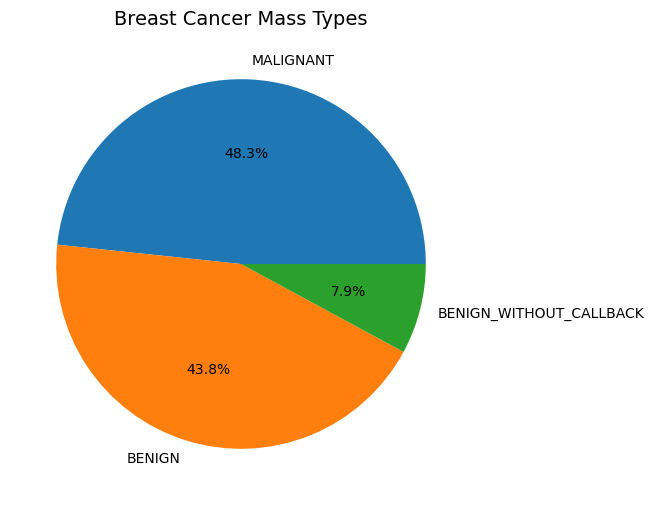

In [19]:
value = mass_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
plt.savefig('images/pathology_distributions_red.png')
plt.show()

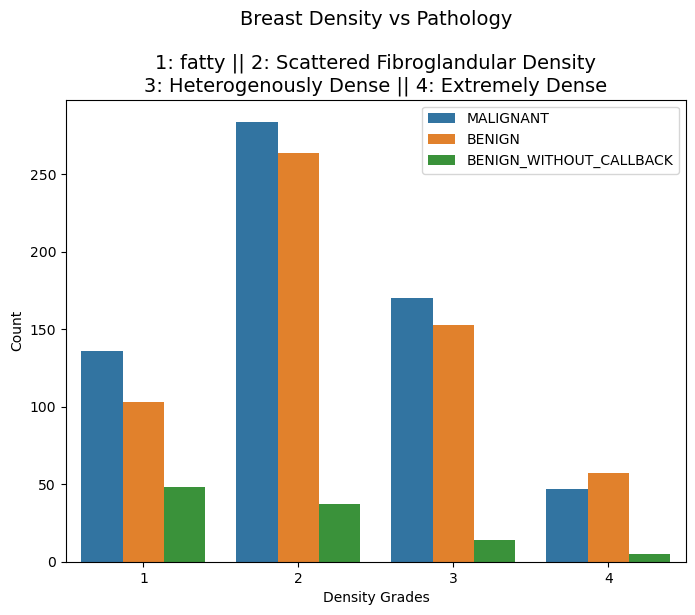

In [20]:
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
plt.savefig('images/density_pathology_red.png')
plt.show()

Full Mammograms:



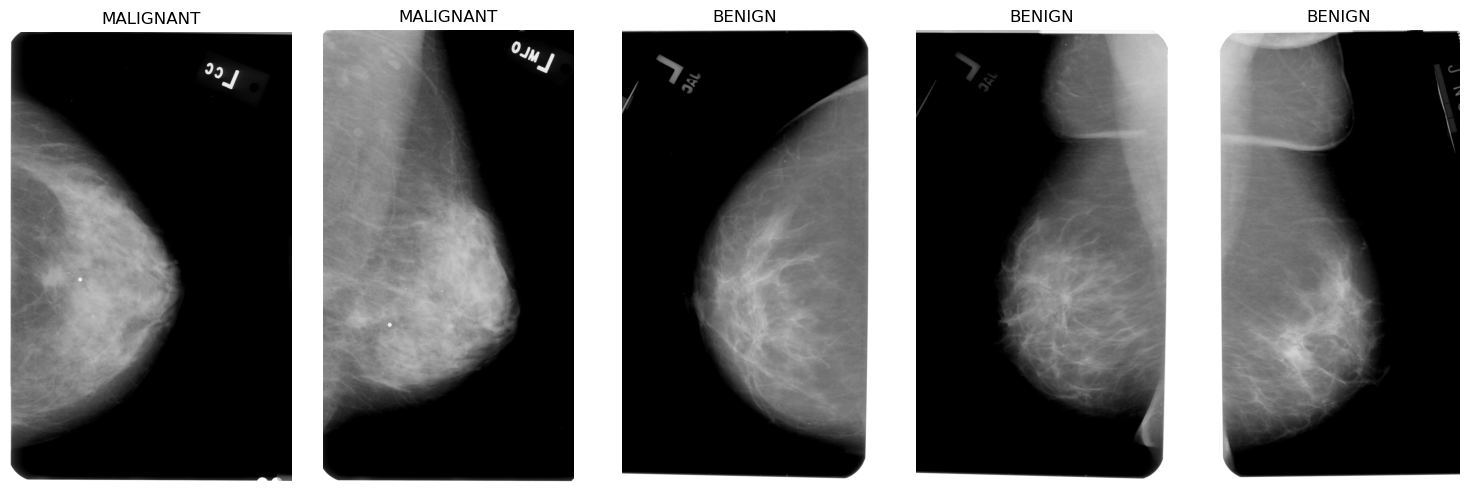

Cropped Mammograms:



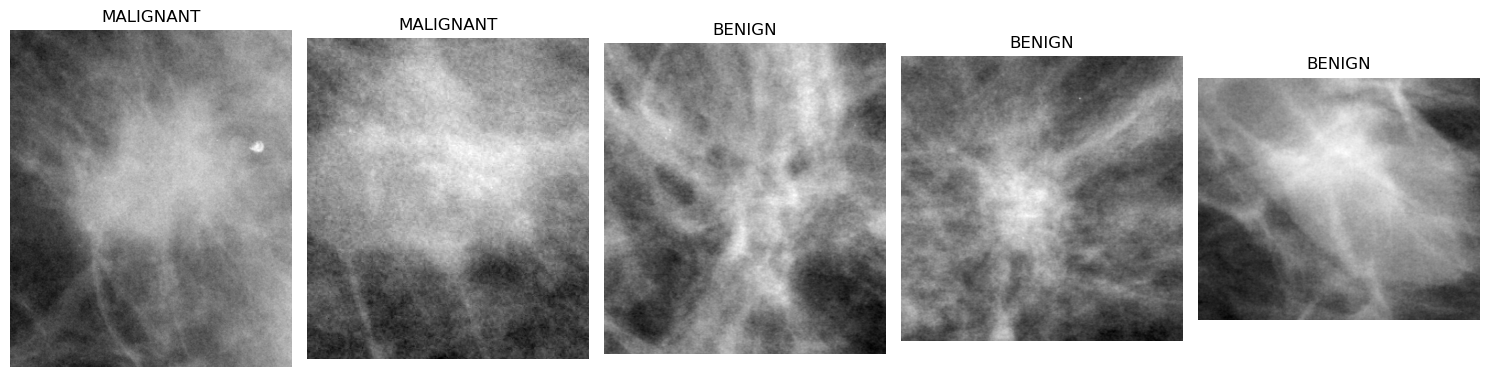

In [21]:

import matplotlib.image as mpimg


def display_images(column, number):
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)

In [23]:
mass_train.image_view.unique()

array(['CC', 'MLO'], dtype=object)

mass_shape
IRREGULAR                                   287
LOBULATED                                   104
OVAL                                         93
ARCHITECTURAL_DISTORTION                     52
IRREGULAR-ARCHITECTURAL_DISTORTION           43
ROUND                                        39
ASYMMETRIC_BREAST_TISSUE                      8
FOCAL_ASYMMETRIC_DENSITY                      5
LOBULATED-IRREGULAR                           3
LOBULATED-ARCHITECTURAL_DISTORTION            2
ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION      1
Name: count, dtype: int64
mass_shape
OVAL                                  220
LOBULATED                             190
ROUND                                  75
IRREGULAR                              55
ARCHITECTURAL_DISTORTION               17
FOCAL_ASYMMETRIC_DENSITY                7
IRREGULAR-ARCHITECTURAL_DISTORTION      4
ROUND-OVAL                              3
LOBULATED-IRREGULAR                     2
IRREGULAR-FOCAL_ASYMMETRIC_DENSITY      2
LOBU

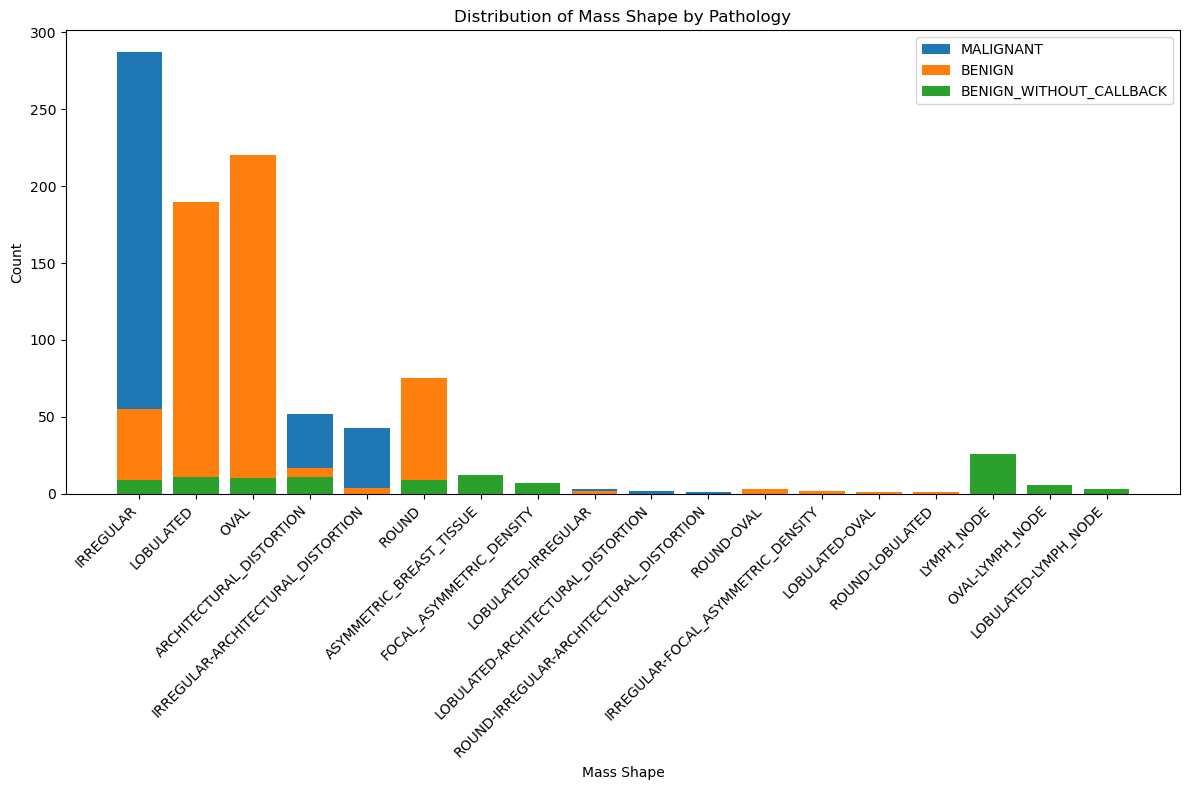

In [22]:
plt.figure(figsize=(12, 8))

for pathology_category in mass_train['pathology'].unique():
    subset_df = mass_train[mass_train['pathology'] == pathology_category]
    shape_counts = subset_df['mass_shape'].value_counts()
    print(shape_counts)
    plt.bar(shape_counts.index, shape_counts.values, label=pathology_category)

plt.xlabel('Mass Shape')
plt.ylabel('Count')
plt.title('Distribution of Mass Shape by Pathology')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.savefig('images/mass_shape_pathology_red.png')
plt.tight_layout()
plt.show()

C:\Users\sauma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


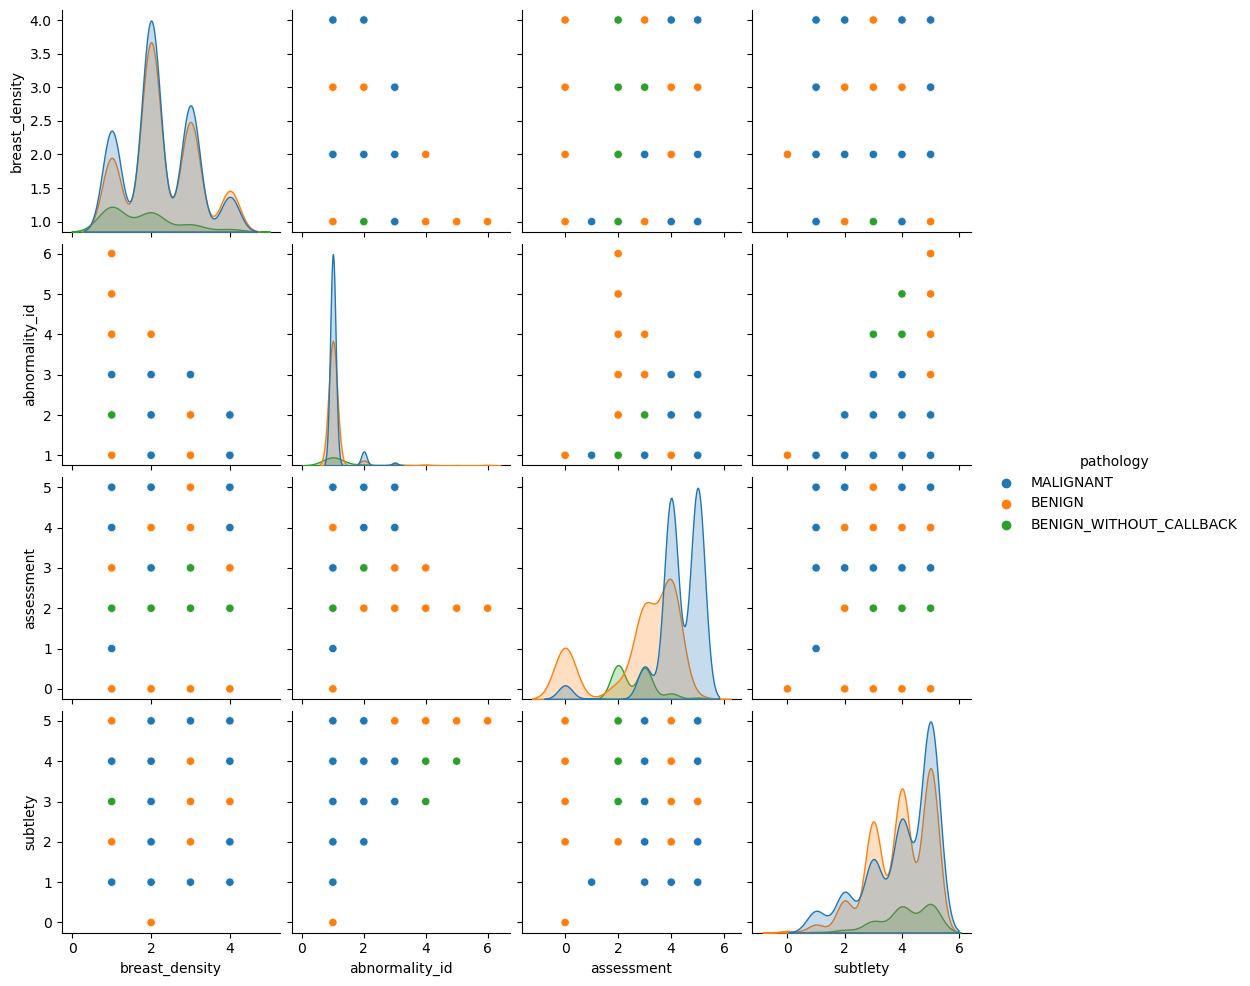

In [23]:
sns.pairplot(mass_train,hue = 'pathology')

# Image Preprocessing


In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

def image_processor(image_path, target_size):
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image_array = image / 255.0
    return image_array


full_mass = pd.concat([mass_train, mass_test], axis=0)


target_size = (224, 224, 3)


full_mass['processed_images'] = full_mass['image_file_path'].apply(lambda x: image_processor(x, target_size))


class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 


X_resized = np.array(full_mass['processed_images'].tolist())


full_mass['labels'] = full_mass['pathology'].replace(class_mapper)

num_classes = len(full_mass['labels'].unique())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resized, full_mass['labels'].values, test_size = 0.2, random_state = 42)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from keras.applications import InceptionResNetV2
from keras.utils import plot_model

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=20)

image_size=224
train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=32)

mode = InceptionResNetV2(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')

for layer in mode.layers[:-5]:
    layer.trainable = False

model = tf.keras.Sequential([
    mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=75)



219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 303s 12s/step - accuracy: 0.5640 - loss: 3.3878 - val_accuracy: 0.5588 - val_loss: 3.4192
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 203s 11s/step - accuracy: 0.7254 - loss: 2.9288 - val_accuracy: 0.6118 - val_loss: 2.9834
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 196s 10s/step - accuracy: 0.8614 - loss: 2.5515 - val_accuracy: 0.5706 - val_loss: 3.0760
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 203s 11s/step - accuracy: 0.9061 - loss: 2.3003 - val_accuracy: 0.5588 - val_loss: 3.0092
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 208s 11s/step - accuracy: 0.9663 - loss: 2.0515 - val_accuracy: 0.5324 - val_loss: 3.0707
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 200s 11s/step - accuracy: 0.9670 - loss: 1.8974 - val_accuracy: 0.5853 - val_loss: 2.6424
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 187s 10s/step - accuracy: 0.9940 - loss: 1.7172 - val_accuracy: 0.6088 - val_loss: 2.5407
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 186s 10s/st

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionResNetV2
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Nadam
from tensorflow.keras.regularizers import l2

def image_processor(image_path, target_size):
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image_array = image / 255.0
    return image_array

full_mass = pd.concat([mass_train, mass_test], axis=0)

target_size = (224, 224, 3)

full_mass['processed_images'] = full_mass['image_file_path'].apply(lambda x: image_processor(x, target_size))
X = np.array(full_mass['processed_images'].tolist())

class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}
full_mass['labels'] = full_mass['pathology'].replace(class_mapper)
y = to_categorical(full_mass['labels'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=30)

train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=32)

mode = InceptionResNetV2(input_shape=(target_size[0], target_size[1], 3), include_top=False, weights='imagenet')

for layer in mode.layers[:-10]:
    layer.trainable = True

model = Sequential([
    mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1000,
    decay_rate=0.9)

model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=lr_schedule), 
              metrics=['accuracy'])

history = model.fit(train_data_augmented, 
                    validation_data=(X_test, y_test), 
                    epochs=20, 
                    batch_size=75)
